In [1]:
!python --version


Python 3.9.21


In [2]:
#%matplotlib widget
import sys
sys.path.insert(0, '/u/ageorge/athena_fork_turb_box/athena_new_version/athena/vis/python')
import athena_read
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import scipy.stats as stats
import pandas as pd
plt.rcParams['animation.ffmpeg_path'] = '/mpcdf/soft/SLE_15/packages/x86_64/ffmpeg/4.4.0/bin/ffmpeg'

#import cmasher as cmr

# Access rainforest colormap through CMasher or MPL
#cmap = cmr.rainforest                   # CMasher


## Plotting current v_turb vs time

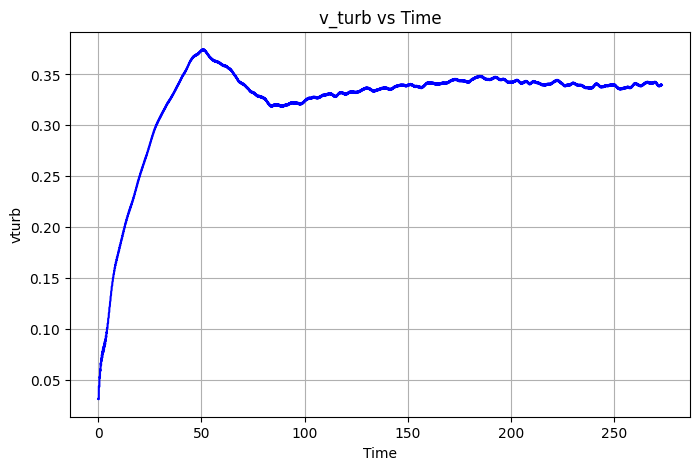

In [3]:
data = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst", comments="#")
time = data[:, 0]
mass = data[:, 2]

KE = data[:, 6] + data[:, 7] + data[:, 8]
vturb = np.sqrt(2 * KE / mass)


plt.figure(figsize=(8, 5))
plt.plot(time, vturb, color="blue")
plt.xlabel("Time")
plt.ylabel("vturb")
plt.title("v_turb vs Time")

plt.grid()
plt.savefig("vturb vs Time.png")
plt.show()



In [50]:
new_vturb = vturb[-500:].mean()
actual_M = new_vturb/cs
actual_M

np.float64(0.3614908565823911)

## Plotting Mach number vs time

In [ ]:
file_names = sorted(glob.glob("Turb_v2_init/Test_6/1/*.athdf"))
gamma = 1.666666666667
vturbs = []
cs = []


for file in tqdm(file_names):
    if "out2" in file:
        data = athena_read.athdf(file)
        pressure = np.mean(data["press"])
        rho = np.mean(data["rho"])
        cs.append(np.sqrt(gamma * pressure / rho))

        velx = data['vel1']
        vely = data['vel2']
        velz = data['vel3']
        velx_mean = np.mean(velx)
        vely_mean = np.mean(vely)
        velz_mean = np.mean(velz)

        velx_prime = velx - velx_mean
        vely_prime = vely - vely_mean
        velz_prime = velz - velz_mean

        vturb = np.sqrt(np.mean(velx_prime**2 + vely_prime**2 + velz_prime**2 ))
        vturbs.append(vturb)
    else:
        pass
    



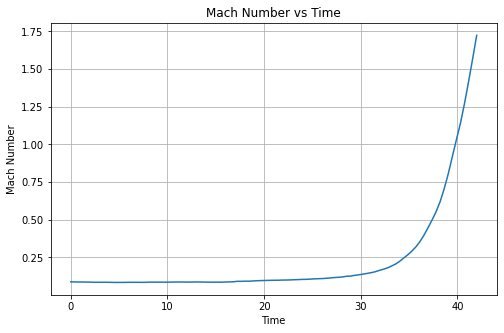

In [11]:
vturbs = np.array(vturbs)
cs = np.array(cs)

Mach_number = vturbs/cs
times = np.linspace(0, 42, 101)

plt.figure(figsize=(8, 5))
plt.plot(times, Mach_number)
plt.xlabel("Time")
plt.ylabel("Mach Number")
plt.title("Mach Number vs Time")

plt.grid()
plt.savefig("Mach number vs Time.png")
plt.show()


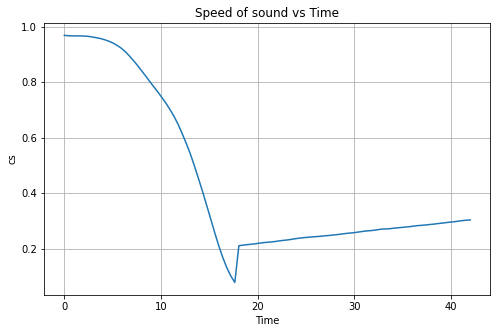

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(times, cs)
plt.xlabel("Time")
plt.ylabel("cs")
plt.title("Speed of sound vs Time")

plt.grid()
plt.savefig("cs vs Time.png")
plt.show()


## Plotting Temperature vs time

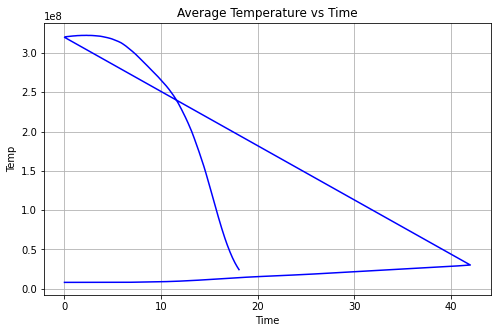

In [8]:
data = np.loadtxt("Turb_v2_init/Test_4/Turb.hst", comments="#")
time = data[:, 0]
temp = data[:,16]/64**3

plt.figure(figsize=(8, 5))
plt.plot(time, temp, color="blue")
plt.xlabel("Time")
plt.ylabel("Temp")
plt.title("Average Temperature vs Time")

plt.grid()
plt.savefig("Temp vs Time.png")
plt.show()
plt.close()


AttributeError: module 'matplotlib.pyplot' has no attribute 'ysca'

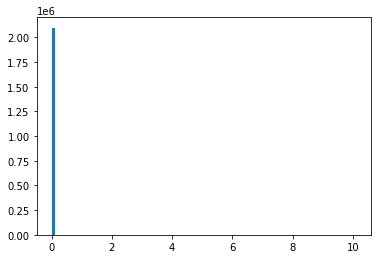

In [61]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00000.athdf')
#data['rho'].shape
#plt.imshow(data['press'][:,:,0])
plt.hist(data['rho'].flatten(), bins = 100)
plt.ysca
plt.show()


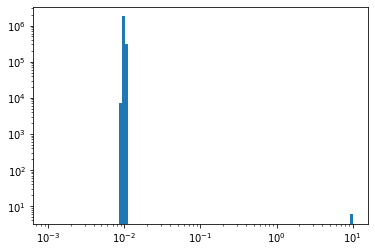

In [66]:
data = athena_read.athdf('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00000.athdf')
#data['rho'].shape
press = data['rho']
#plt.imshow(data['press'][:,:,0])
plt.hist(press.flatten(), bins = np.logspace(-3,1, 100))
plt.xscale('log')
plt.yscale('log')
plt.show()

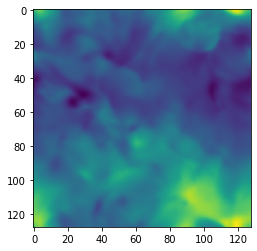

In [10]:
file_names = sorted(glob.glob("Turb_v2_init/Test_4_lowerturb/*.athdf"))

fig, ax = plt.subplots()
images = []


for file in tqdm(file_names[:]):
    if "out2" in file:
        rho = athena_read.athdf(file)["press"]
        image = ax.imshow(rho[:,:,64], cmap="viridis", animated=True)
        images.append([image])
    else:
        pass

ani = animation.ArtistAnimation(fig = fig, artists = images, interval = 150, blit = True )

ani.save('Test_4_lowerturb_press.mp4')

In [10]:
# rho = athena_read.athdf("/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00000.athdf")["rho"]
# plt.imshow(np.sum(rho, axis = 2), cmap="viridis", animated=True)
# plt.show()
data = athena_read.athdf("/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00000.athdf")["Time"]
data

np.float64(0.0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 87/87 [04:58<00:00,  3.44s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

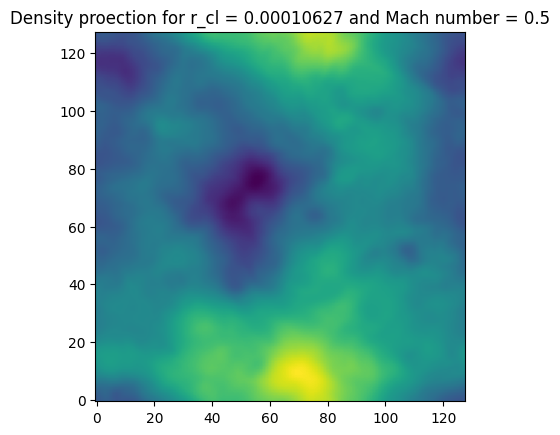

In [20]:

file_names = sorted(glob.glob("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/*.athdf"))
file_names = [i for i in file_names if "out2" in i]
fig, ax = plt.subplots()
images = []
i = 0
for file in tqdm(file_names):
    if "out2" in file:
        rho = athena_read.athdf(file)["rho"]
        rho_proj = np.exp(np.mean(np.log(rho + 1e-6), axis=2))
        #rho_proj = np.sum(rho, axis=2)
        
        image = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower")
        plt.savefig(f"/u/ageorge/athena_fork_turb_box/Snapshots/M0.5_0.01/{i}.png")
        images.append([image])

        i+=1

ax.set_title("Density proection for r_cl = 0.00010627 and Mach number = 0.5")

#cbar = plt.colorbar(images[0][0], ax=ax)
#cbar.set_label("Projected Density")

ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('TESTalpha_10_rho_proj.mp4', fps=10, dpi=150)

plt.show()

In [27]:
ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('TESTalpha_10_rho_proj.mp4', fps = 10, dpi = 150, writer='ffmpeg')

plt.show()

Processing files:   0%|          | 0/101 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/u/ageorge/athena_fork_turb_box/Snapsbhots/M0.5_1/0.png'

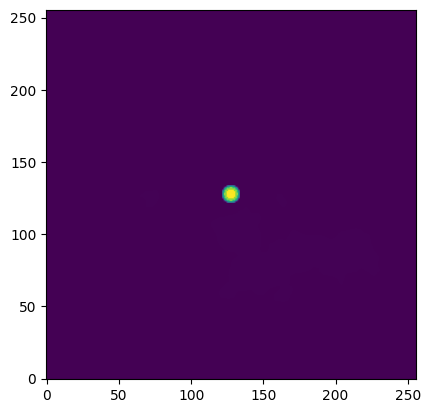

In [9]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm.notebook import tqdm
import athena_read

# Define file path and get sorted list of relevant files
files = "/ptmp/mpa/ageorge/athena/Cloud_1/*.athdf"
file_names = sorted(glob.glob(files))

# Filter only relevant files
file_names = [f for f in file_names if "out2" in f]

# Set up figure and axis
fig, ax = plt.subplots()
cbar = None

def process_file(file):
    rho = athena_read.athdf(file)["rho"]
    return np.sum(rho, axis = 2)  
    #return np.exp(np.mean(np.log(rho + 1e-6), axis=2))

# Read and process all data files
rho_projections = [process_file(file) for file in tqdm(file_names, desc="Processing files")]

# Normalize color scale for consistent visualization
vmin, vmax = np.min(rho_projections), np.max(rho_projections)

# Prepare animation frames
images = []
for i, rho_proj in enumerate(rho_projections):
    img = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower" ,vmin=vmin, vmax=vmax)
    images.append([img])
    plt.savefig(f"/u/ageorge/athena_fork_turb_box/Snapshots/M0.5_1/{i}.png")

# Add title and colorbar
#ax.set_title("Density Projection for r_cl = 0.00010627 and Mach number = 0.5")
if cbar is None:
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("Projected Density")

# Create animation
ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('M0.5_1.mp4', fps=7, dpi=150, writer = "ffmpeg")

plt.show()


In [12]:
vmin, vmax = np.min(rho_projections), np.max(rho_projections)

# Prepare animation frames
images = []
for i, rho_proj in enumerate(rho_projections):
    img = ax.imshow(rho_proj, cmap="viridis", animated=True, origin="lower" ,vmin=vmin, vmax=vmax)
    images.append([img])
    plt.savefig(f"/u/ageorge/athena_fork_turb_box/Snapshots/M0.5_1/{i}.png")

# Add title and colorbar
#ax.set_title("Density Projection for r_cl = 0.00010627 and Mach number = 0.5")
if cbar is None:
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("Projected Density")

# Create animation
ani = animation.ArtistAnimation(fig, images, interval=150, blit=True)
ani.save('M0.5_1.mp4', fps=7, dpi=150, writer = "ffmpeg")

plt.show()

<Figure size 640x480 with 0 Axes>

In [4]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import athena_read
import cmasher as cmr


def process_file(file):
    rho = athena_read.athdf(file)["rho"]
    time = athena_read.athdf(file)["time"]
    return np.sum(rho, axis=2), time

selected_files = {
    "Cloud_0.01": [
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00015.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00035.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00067.athdf"
    ],
    "Cloud_1": [
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00015.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00035.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00067.athdf"
    ]
}

# Read and process data from both folders
data = {}
for key, files in selected_files.items():
    data[key] = [process_file(file) for file in files]

# Determine global color scale
vmin = min(np.min(proj) for projections in data.values() for proj in projections)
vmax = max(np.max(proj) for projections in data.values() for proj in projections)

# Create subplots with adjusted figure size
fig, axes = plt.subplots(4, 2, figsize=(10, 12), constrained_layout=True)
# Plot the data
for i in range(4):
    for j, (key, rho_projections) in enumerate(data.items()):
        ax = axes[i, j]
        img = ax.imshow(np.log10(rho_projections[i] + 1e-6), cmap="viridis", origin="lower",
                vmin=np.log10(vmin+1e-6), vmax=np.log10(vmax+1e-6))
        ax.axis("off")  # Hide axes

# Add overall titles
axes[0, 0].set_title("Cloud Growth", fontsize=16, fontweight='bold')  # Title for Cloud_0.01
axes[0, 1].set_title("Cloud Death", fontsize=16, fontweight='bold')  # Title for Cloud_1

plt.suptitle("(a)", fontsize=12, fontweight='bold')

# Adjust colorbar outside the plot (right side)
# After plotting the density projections in a 4×2 grid, do:
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(img, cax=cbar_ax, orientation = 'vertical')
cbar.set_label("Projected Density")

# Show plot
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.png")
plt.show()


KeyError: 'time'

NameError: name 'cbar' is not defined

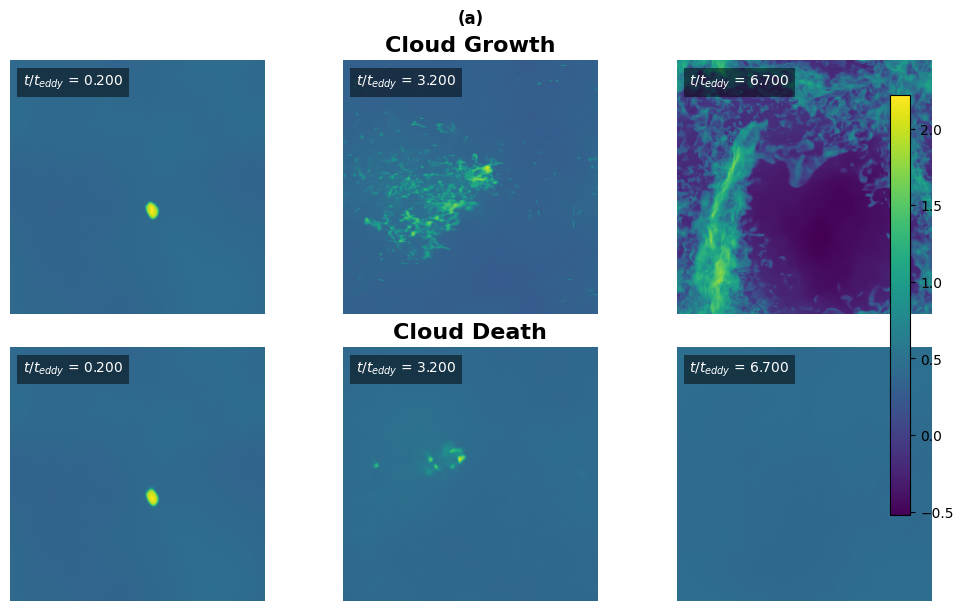

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read
import cmasher as cmr


# t_eddy from input file
t_eddy_01 = 27.3
t_eddy_1  = 0.273

def process_file(filepath):
    """
    Reads an Athena file and returns the density projection (summed along z)
    and the simulation time.
    """
    data = athena_read.athdf(filepath)
    projection = np.sum(data["rho"], axis=2)  # delta_x / L_box
    time = data["Time"]
    return projection, time

# Define the file paths for each simulation
selected_files = {
    "Cloud_0.01": [
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00032.athdf",
        #"/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00035.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00067.athdf"
    ],
    "Cloud_1": [
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00032.athdf",
        #"/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00035.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00067.athdf"
    ]
}


data = {}
for label, file_list in selected_files.items():
    data[label] = [process_file(f) for f in file_list]


vmin = min(np.min(proj) for projections in data.values() for proj, _ in projections)
vmax = max(np.max(proj) for projections in data.values() for proj, _ in projections)


fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True)

for row in range(3):
    for col, (label, projections) in enumerate(data.items()):
        ax = axes[col, row]
        projection, time = projections[row]
        log_proj = np.log10(projection + 1e-9)
        img = ax.imshow(log_proj, cmap='viridis', origin="lower",
                        vmin=np.log10(vmin ), vmax=np.log10(vmax))
        ax.axis("off")
        if col == 0: # Growth
            ax.text(0.05, 0.9, rf"$t/t_{{eddy}}$ = {(time / t_eddy_01):.3f}", color="white", fontsize=10,
                transform=ax.transAxes, bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))
        else:
            ax.text(0.05, 0.9, rf"$t/t_{{eddy}}$ = {(time / t_eddy_1):.3f}", color="white", fontsize=10,
                transform=ax.transAxes, bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))            

axes[0, 1].set_title("Cloud Growth", fontsize=16, fontweight="bold")
axes[1, 1].set_title("Cloud Death", fontsize=16, fontweight="bold")


plt.suptitle("(a)", fontsize=12, fontweight="bold")


# cbar_ax = fig.add_axes([0.15, 0.001, 0.7,  0.02])
# cbar = fig.colorbar(img, cax=cbar_ax, orientation="horizontal")
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(img, cax=cbar_ax, orientation = 'vertical')
cbar.set_label(r"$log(\rho)$", fontsize=12)

plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.png", dpi = 900)
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.pdf")

plt.show()

starting to process
data processed


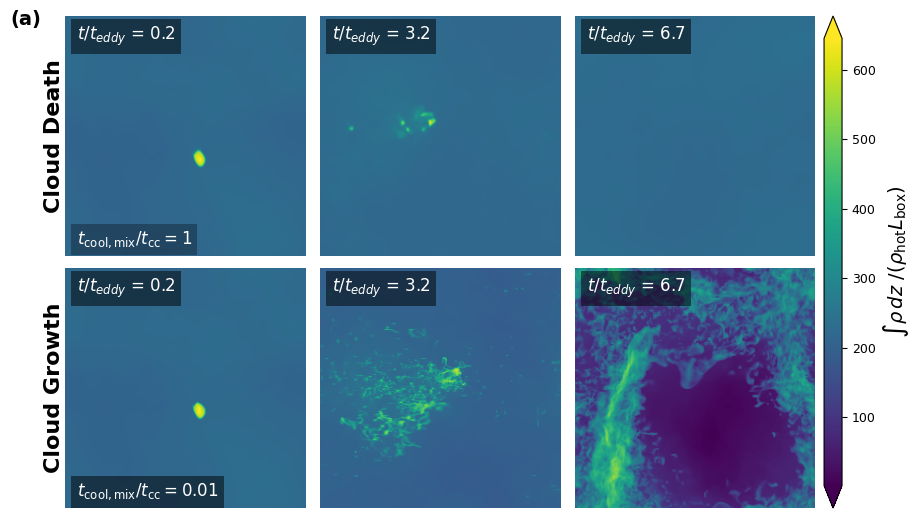

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read
import cmasher as cmr  
import matplotlib as mt
from tqdm.notebook import tqdm

# t_eddy from input file
t_eddy_01 = 27.3
t_eddy_1  = 0.273

#Normalising density with rho_floor * r_cl
p_floor = 0.001
rcl_01 = 0.21254448
rcl_1 = 0.00212544

def process_file(filepath, label):
    data = athena_read.athdf(filepath)
    projection = np.sum(data["rho"], axis=2) * 1/256 #spatially averaged
    #Normalising factor of rho_floor * rcl
    normalising_factor = p_floor#*(rcl_01 if label == "Cloud_0.01" else rcl_1)
    norm_proj = projection / normalising_factor                                  
    time = data["Time"]
    return norm_proj, time

selected_files = {
    "Cloud_0.01": [
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00032.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00067.athdf"
    ],
    "Cloud_1": [
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00032.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00067.athdf"
    ]
}
print("starting to process")
data = {label: [process_file(f, label) for f in files] for label, files in selected_files.items()}
print("data processed")
vmin = min(np.min(proj) for projections in data.values() for proj, _ in projections)
vmax = max(np.max(proj) for projections in data.values() for proj, _ in projections)

#### Manual layout ####
fig = plt.figure(figsize=(9, 6))
ax = []

left0 = 0.06
bottom0 = 0.15 # slight raise to give titles space
width = 0.27
height = 0.4
edge_correction = 1.05

bottom = bottom0
ax += [[
    fig.add_axes([left0 + i * width * edge_correction, bottom, width, height])
    for i in range(3)
]]

bottom += height + 0.02
ax += [[
    fig.add_axes([left0 + i * width * edge_correction, bottom, width, height])
    for i in range(3)
]]

ax = np.array(ax)

labels = list(data.keys())
for row in range(2):  # 2 rows
    for col in range(3):  # 3 columns
        label = labels[row]
        projection, time = data[label][col]
        # normalise_factor = (p_floor*rcl_01)  if label == "Cloud_0.01" else (p_floor*rcl_1)
        # print(normalise_factor / p_floor)
        
        log_proj = np.log10(projection) # / normalise_factor )
        axis = ax[row, col]
        img = axis.imshow(log_proj, cmap='viridis', origin='lower',
                          vmin=np.log10(vmin), vmax=np.log10(vmax))
        axis.axis('off')
        t_eddy = t_eddy_01 if label == "Cloud_0.01" else t_eddy_1
        axis.text(0.05, 0.9, rf"$t/t_{{eddy}}$ = {(time / t_eddy):.1f}", color="white", fontsize=12,
                  transform=axis.transAxes, bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))


# ax[0, 1].set_title("Cloud Growth", fontsize=16, fontweight="bold", pad=5)
# ax[1, 1].set_title("Cloud Death", fontsize=16, fontweight="bold", pad=5)

fig.text(0.05, bottom0 + height/2, "Cloud Growth", va='center', ha='center', rotation='vertical',
         fontsize=16, fontweight="bold")
fig.text(0.05, bottom + height/ 2, "Cloud Death", va='center', ha='center', rotation='vertical',
         fontsize=16, fontweight="bold")

ax[0, 0].text(0.05, 0.05, r"$t_{\mathrm{cool,mix}} / t_{\mathrm{cc}} = 0.01$",
              transform=ax[0, 0].transAxes, color="white", fontsize=12,
              bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))

ax[1, 0].text(0.05, 0.05, r"$t_{\mathrm{cool,mix}} / t_{\mathrm{cc}} = 1$",
              transform=ax[1, 0].transAxes, color="white", fontsize=12,
              bbox=dict(facecolor="black", alpha=0.3, edgecolor="none"))


plt.suptitle("(a)", fontsize=14, fontweight="bold", x=0.001, ha='left')

#color_range = [np.log10(vmin), np.log10(vmax)]
color_range  = [vmin, vmax]
cmap = cmr.bubblegum_r  # Or any other you like from cmasher

# Create custom colorbar
cax = fig.add_axes([
    left0 + 3 * width * edge_correction - 0.005,  # moved left
    bottom0,
    0.02,
    2*height + 0.02
])

cbar1 = plt.colorbar(
    mt.cm.ScalarMappable(
        norm=mt.colors.Normalize(vmin=color_range[0], vmax=color_range[1]),
        cmap='viridis',
    ),
    extend="both",
    cax=cax,
    shrink=0.9,
)
cbar1.set_label(r"$\int \rho\,dz\ /(\rho_{\text{hot}} L_{\text{box}})$", fontsize = 14, fontweight = 'bold')
cbar1.ax.tick_params(labelsize=9)

# Save
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.png", dpi=900)
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.pdf")
plt.show()

Starting to process
Data processed


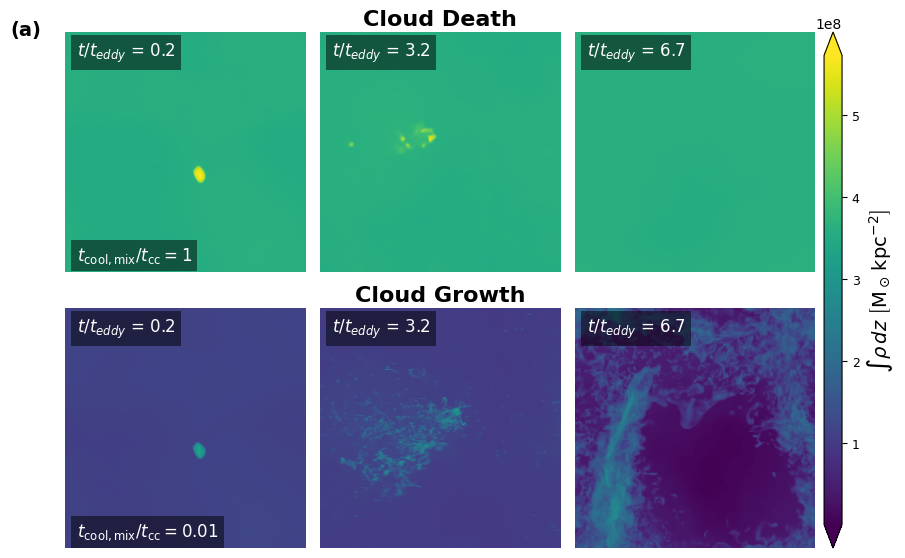

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read
import cmasher as cmr  
import matplotlib as mt
from tqdm.notebook import tqdm

# t_eddy from input file
t_eddy_01 = 27.3
t_eddy_1  = 0.273

# Normalising density with rho_floor * r_cl
p_floor = 0.0000005
rcl_01 = 0.21254448
rcl_1 = 0.00212544

def process_file(filepath, label):
    data = athena_read.athdf(filepath)
    # Spatially averaged along z; a factor of 1/256 
    projection = np.sum(data["rho"], axis=2) * (1/256)
    # Choose the appropriate r_cl based on the label
    normalising_factor = p_floor * (rcl_01 if label == "Cloud_0.01" else rcl_1)
    norm_proj = projection / normalising_factor                                  
    time = data["Time"]
    return norm_proj, time

selected_files = {
    "Cloud_0.01": [
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00032.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.out2.00067.athdf"
    ],
    "Cloud_1": [
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00002.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00032.athdf",
        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.out2.00067.athdf"
    ]
}

print("Starting to process")
data = {label: [process_file(f, label) for f in files] for label, files in selected_files.items()}
print("Data processed")

# Determine common min and max for normalisation (across all projections)
vmin = min(np.min(proj) for projections in data.values() for proj, _ in projections)
vmax = max(np.max(proj) for projections in data.values() for proj, _ in projections)

#### Manual layout ####
fig = plt.figure(figsize=(9, 6))
ax = []

left0 = 0.06
bottom0 = 0.1  # slight raise to give titles space
width = 0.27
height = 0.4
edge_correction = 1.05

bottom = bottom0
ax += [[
    fig.add_axes([left0 + i * width * edge_correction, bottom, width, height])
    for i in range(3)
]]
bottom += height + 0.06  
ax += [[
    fig.add_axes([left0 + i * width * edge_correction, bottom, width, height])
    for i in range(3)
]]

ax = np.array(ax)
labels = list(data.keys())

for row in range(2):  # 2 rows
    for col in range(3):  # 3 columns
        label = labels[row]
        projection, time = data[label][col]
        log_proj = np.log10(projection)
        axis = ax[row, col]
        img = axis.imshow(log_proj, cmap='viridis', origin='lower',
                          vmin=np.log10(vmin), vmax=np.log10(vmax))
        axis.axis('off')
        t_eddy = t_eddy_01 if label == "Cloud_0.01" else t_eddy_1
        axis.text(0.05, 0.9, rf"$t/t_{{eddy}}$ = {(time / t_eddy):.1f}", color="white", fontsize=12,
                  transform=axis.transAxes, bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))

ax[0, 1].set_title("Cloud Growth", fontsize=16, fontweight="bold", pad=5)
ax[1, 1].set_title("Cloud Death", fontsize=16, fontweight="bold", pad=5)

ax[0, 0].text(0.05, 0.05, r"$t_{\mathrm{cool,mix}} / t_{\mathrm{cc}} = 0.01$",
              transform=ax[0, 0].transAxes, color="white", fontsize=12,
              bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))

ax[1, 0].text(0.05, 0.05, r"$t_{\mathrm{cool,mix}} / t_{\mathrm{cc}} = 1$",
              transform=ax[1, 0].transAxes, color="white", fontsize=12,
              bbox=dict(facecolor="black", alpha=0.5, edgecolor="none"))

plt.suptitle("(a)", fontsize=14, fontweight="bold", x=0.001, ha='left')

# Define color range and colormap
color_range  = [vmin, vmax]
cmap = cmr.bubblegum_r  # Optionally, choose any preferred colormap from cmasher

# Create custom colorbar
cax = fig.add_axes([
    left0 + 3 * width * edge_correction - 0.005,  # Adjusted position
    bottom0,
    0.02,
    2 * height + 0.06
])

cbar1 = plt.colorbar(
    mt.cm.ScalarMappable(
        norm=mt.colors.Normalize(vmin=color_range[0], vmax=color_range[1]),
        cmap='viridis',
    ),
    extend="both",
    cax=cax,
    shrink=0.9,
)
cbar1.set_label(r"$\int \rho\,dz\ \left[\mathrm{M}_\odot\,\mathrm{kpc}^{-2}\right]$", fontsize=14, fontweight='bold')
cbar1.ax.tick_params(labelsize=9)

# Save the figure in both PNG and PDF formats.
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.png", dpi=900)
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/projections.pdf")
plt.show()


In [80]:

M = 0.75
cs = cs_calc(40000000, 0.6)
v_turb = M*cs
chi = 1000
amb_rho   = np.array([0.01])
print("vturb:",v_turb)


alpha = np.logspace(-3, 2, 6)

t_cool_mix   = tcool_calc(amb_rho*np.sqrt(chi_cold),np.sqrt(T_floor*T_hot),Z, Lambda_fac=Lambda_fac) #Changing amb rho to make it lower
#alpha = np.array([100])

def tcc_calc(M, chi = 1000, r_cl = 0.025):
    return np.sqrt(chi) * r_cl / (M*cs)

def r_cl_calc(alpha_array):
    return t_cool_mix * M * cs /(np.sqrt(chi) * alpha_array)

def dedt_calc(Ls):
    return 0.5 * Ls**2 * amb_rho * v_turb**3

def t_eddy_calc(Ls):
    return Ls/v_turb



r_cls = r_cl_calc(alpha)
Ls = r_cls*40
x = Ls/2
dedt = dedt_calc(Ls)
t_eddy = t_eddy_calc(Ls)
dtdrive = t_eddy/100
tlimit = t_eddy * 10


print("cs:",cs)
print(f't_cool_mix: {t_cool_mix}') 
# for i in range(len(alpha)):
print(alpha, r_cls, Ls, x, dedt, t_eddy, dtdrive, tlimit)


vturb: 0.4656976162122717
cs: 0.6209301549496956
t_cool_mix: [0.21648962]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02] [3.18816722e+00 3.18816722e-01 3.18816722e-02 3.18816722e-03
 3.18816722e-04 3.18816722e-05] [1.27526689e+02 1.27526689e+01 1.27526689e+00 1.27526689e-01
 1.27526689e-02 1.27526689e-03] [6.37633444e+01 6.37633444e+00 6.37633444e-01 6.37633444e-02
 6.37633444e-03 6.37633444e-04] [8.21266705e+00 8.21266705e-02 8.21266705e-04 8.21266705e-06
 8.21266705e-08 8.21266705e-10] [2.73840115e+02 2.73840115e+01 2.73840115e+00 2.73840115e-01
 2.73840115e-02 2.73840115e-03] [2.73840115e+00 2.73840115e-01 2.73840115e-02 2.73840115e-03
 2.73840115e-04 2.73840115e-05] [2.73840115e+03 2.73840115e+02 2.73840115e+01 2.73840115e+00
 2.73840115e-01 2.73840115e-02]


In [12]:
data = np.column_stack((alpha, r_cls, Ls, x, dedt, t_eddy, dtdrive, tlimit))
headers = "alpha,r_cl,L,x,dedt,t_eddy,dtdrive,tlimit"
np.savetxt("M0.75_simulation_data.csv", data, delimiter=",", header=headers, comments="", fmt=["%.3f","%.8f","%.9f","%.10f","%.15f","%.15f","%.15f","%.15f"])  

ValueError: x and y must be the same size

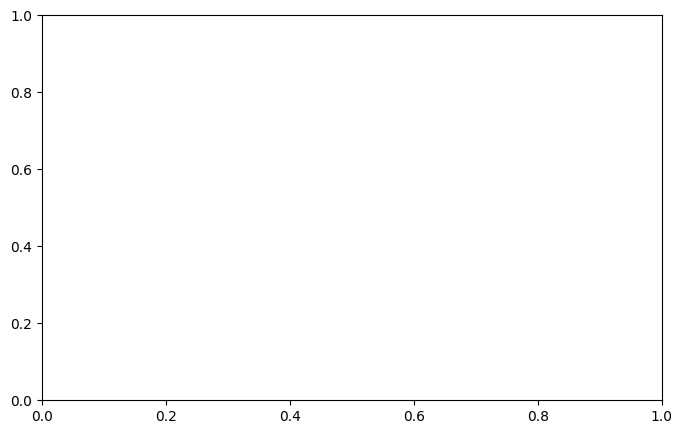

In [13]:
plt.figure(figsize=(8, 5))
plt.scatter(np.ones((2))*M, alpha)
plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=14)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=14)

plt.yscale('log')
plt.tight_layout()

plt.legend()
plt.show()

In [79]:
chi_cold = 1000

# Chemical composition
Xsol = 1.0;
Zsol = 1.0;

X = Xsol * 0.7381;
Z = Zsol * 0.0134;
Y = 1 - X - Z;

# Relevant temperature
T_floor      = 40000             # floor temperature in the simulation
T_ceil       = 1000000000         # ceiling temperature in the simulation
T_hot_req    = 40000000           # hot medium temperature required, reset to this on restart, if cloud_flag is 1
T_hot        = 10000000            # initial hot medium temperature (box heats up due to turbulence) increased by a order
T_cold       = 80000             # cold medium temperature, used in cold gas mass calculation
T_cut_mul    = 0.5               # T_cut = T_hot_req * T_cut_mul, gas higher than T_cut is not cooled
T_cut        = 20000000.0         # gas higher than T_cut is not cooled

amb_rho   = np.array([1e-3]) #### Isn't amb_rho 1? 1.6e-4
# Lambda_fac = np.array([1e4,5000,1000.0,500.0,100.0, 50.0, 10.0, 5.0, 1.0, 0.5, 0.1]) 
Lambda_fac = np.array([1.0]) 


t_cool_mix   = tcool_calc(amb_rho*np.sqrt(chi_cold),np.sqrt(T_floor*T_hot),Z, Lambda_fac=Lambda_fac)
print(t_cool_mix)

# Ms = np.array([0.25, 0.5, 0.75])
# r_cls = np.array([0.25, 0.025, 0.0025])
# t_ccs_25 = np.array([tcc_calc(r_cls[0], 1000, i) for i in Ms])
# t_ccs_025 = np.array([tcc_calc(r_cls[1], 1000, i) for i in Ms])
# t_ccs_0025 = np.array([tcc_calc(r_cls[2], 1000, i) for i in Ms])

# for i in r_cls:
#     for j in Ms:
#         t_cc = tcc_calc(j, 1000, i)
#         t_ccs = np.append(t_ccs, t_cc)

#print(t_ccs)

#alpha = t_cool_mix / t_ccs

#print(t_ccs_25)

[2.1648962]


In [ ]:
print(t_ccs_25)

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(Ms, t_cool_mix/t_ccs_25, label = "r_cl = 0.25")
plt.scatter(Ms, t_cool_mix/t_ccs_025, label = "r_cl = 0.025")
plt.scatter(Ms, t_cool_mix/t_ccs_0025, label = "r_cl = 0.0025")
plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=14)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=14)

#plt.yscale('log')
plt.tight_layout()

plt.legend()
plt.show()

In [76]:
import sys

sys.path.insert(1, 'utils')

import units as un
import power_law_fit_max as pm

def Lam_fn(T, Zsol=1.0, Lambda_fac=1.0):
    Lam_file = np.loadtxt("utils/CT_WSS09.dat")

    T_min = np.min(Lam_file[:, 0])
    T_max = np.max(Lam_file[:, 0])

    N = np.shape(Lam_file)[0]

    if T < T_min or T > T_max:
        return 0.0

    else:
        i_a = 0
        i_b = N - 1

        while i_a != i_b - 1:
            mid = int((i_a + i_b) / 2)

            if T > Lam_file[mid, 0]:
                i_a = mid
            else:
                i_b = mid

        T_a = Lam_file[i_a, 0]
        T_b = Lam_file[i_b, 0]

        LamH_a = Lam_file[i_a, 1]
        LamH_b = Lam_file[i_b, 1]

        LamZ_a = Lam_file[i_a, 2]
        LamZ_b = Lam_file[i_b, 2]

        dT = T_b - T_a

        LamH = LamH_a * (T_b - T) / dT + LamH_b * (T - T_a) / dT
        LamZ = LamZ_a * (T_b - T) / dT + LamZ_b * (T - T_a) / dT

    return (LamH + LamZ * Zsol) * Lambda_fac

def Lam_fn_powerlaw(T, Zsol=1.0, Lambda_fac=1.0):
    T_min = np.min(pm.cool_t)
    T_max = np.max(pm.cool_t)

    N = len(pm.cool_t)

    if T < T_min or T > T_max:
        return 0.0

    else:
        i_a = 0
        i_b = N - 1

        while i_a != i_b - 1:
            mid = int((i_a + i_b) / 2)

            if T > pm.cool_t[mid]:
                i_a = mid
            else:
                i_b = mid

        T_a = pm.cool_t[i_a]
        T_b = pm.cool_t[i_b]

        Lam = (pm.cool_coef[i_a] * 1e-23) * (T / pm.cool_t[i_a]) ** pm.cool_index[i_a]

        return Lam * Lambda_fac


def tcool_calc(rho, T, Zsol=1.0, Lambda_fac=1.0, fit_type="max"):
    n_H = rho * un.unit_density / (un.muH * un.CONST_amu)

    fit_dict = {}
    fit_dict["max"] = Lam_fn_powerlaw
    # fit_dict['5pnt_pwlf'] = Lam_fn_powerlaw_pwlf_fit
    fit_dict["continuous"] = Lam_fn

    lam_arr = fit_dict[fit_type](T=T, Zsol=Zsol, Lambda_fac=Lambda_fac)
    # print(f"{lam_arr=}")

    p = rho * T / (un.KELVIN * un.mu)  # in code units
    # print(f"{p= }")

    q = n_H * n_H * lam_arr / un.unit_q  # in code units

    if q == 0:
        return math.nan
    # print(f"{un.muH= }")

    tc = p / (q * (un.g - 1))  # in code units
    # print(f"{tc= }")

    return tc
    # in code units

cs = cs_calc(10000000, 0.6)

def tcc_calc(M, chi = 1000, r_cl = 0.025):
    return np.sqrt(chi) * r_cl / (M*cs)

In [75]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys


CONST_pc = 3.086e18
CONST_yr = 3.154e7
CONST_amu = 1.66053886e-24
CONST_kB = 1.3806505e-16

unit_length = CONST_pc * 1e3  # 1 kpc
unit_time = CONST_yr * 1e6  # 1 Myr
unit_density = CONST_amu  # 1 mp/cm-3
unit_velocity = unit_length / unit_time

def cs_calc(T_hot, mu=0.5):
    # cs_ini = 0.06725645065307617

    # cs_new = cs_ini*np.sqrt(T_hot/1e7)

    M = 1e-3
    R = 8.31446261815324

    # mu = 0.5

    kB = 1.38 * 1e-23
    mp = 1.66 * 1e-27

    m_to_cm = 100

    # return np.sqrt(g.g*R*T_hot/M) * m_to_cm/g.unit_velocity
    return np.sqrt(0.666 * kB / (mu * mp) * T_hot) * m_to_cm / unit_velocity

In [ ]:

data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_1/Cloud/Turb.hst", comments="#")
#data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_11/0.00559328/1/Cloud/Turb.hst", comments="#")
# data_5_99    = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_5.99/Cloud/Turb.hst", comments="#")
# data_359     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.hst", comments="#")


# data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/Turb.hst", comments="#")
# #data_10      = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_11/0.00559328/1/Cloud/Turb.hst", comments="#")
# data_5_99    = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/Turb.hst", comments="#")
# data_359     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha0.1/Cloud/Turb.hst", comments="#")

tcc_8 = tcc_calc(0.5 )
alpha_8 = t_cool_mix/tcc_8
print(alpha_8)

data_0_0425     = np.loadtxt("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_8/1/Turb.hst", comments="#")



cold_mass_10 = data_10[:,13]
cold_mass_10 =cold_mass_10[cold_mass_10 !=0 ]
time_10 = data_10[:len(cold_mass_10), 0]

# cold_mass_5_99 = data_5_99[:,13]
# cold_mass_5_99 =cold_mass_5_99[cold_mass_5_99 !=0 ]
# time_5_99 = data_5_99[:len(cold_mass_5_99), 0]

# cold_mass_359 = data_359[:,13]
# cold_mass_359 =cold_mass_359[cold_mass_359 !=0 ]
# time_359 = data_359[:len(cold_mass_359), 0]

# cold_mass_0_0425 = data_0_0425[:,13]
# cold_mass_0_0425=cold_mass_0_0425[cold_mass_0_0425 !=0 ]
# time_0_0425 = data_0_0425[:len(cold_mass_0_0425), 0]

plt.figure(figsize=(8, 5))
plt.plot(time_10, cold_mass_10/cold_mass_10[0], label = "M = 0.5")
# plt.plot(time_5_99, cold_mass_5_99/cold_mass_5_99[0], label = "M = 0.75" )
# plt.plot(time_359, cold_mass_359/cold_mass_359[0], label = "M = 0.25" )
#plt.plot(time_0_0425, cold_mass_0_0425/cold_mass_0_0425[0], label = "alpha = 0.0425" )

plt.xlabel("Time")
plt.ylabel("m/m(t=0)")
plt.legend()


plt.grid()
plt.show()
plt.close()


In [ ]:
!python --version


In [ ]:
import yt
yt.__version__

data_read.py()::get_array_athena(): Returning fields: ('rho',)


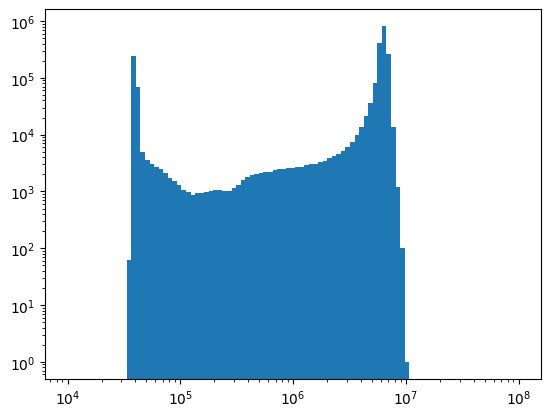

In [18]:
import own_package.athena.data_read as re

#val = re.get_array_athena('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_3.59/Cloud/Turb.out2.00002.athdf')
val = re.get_array_athena('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_8/1/Turb.out2.00050.athdf')

T = val['T']

plt.hist(T.flatten(), bins = np.logspace(4,8, 100))
plt.xscale('log')
plt.yscale('log')
plt.show()

In [85]:
np.concatenate([mass_ratios_15, mass_ratios_16, mass_ratios_14, mass_ratios_17])

array([ 1.16454069, -2.63124826, -2.31389695, -2.01643384, -1.41974054,
        1.18532007,  1.15565799, -2.61707392, -2.0678753 , -1.4939881 ,
        1.2946672 , -1.85352386, -0.52555038,  1.10555199,  1.10555199,
        0.27212981,  1.06884761, -2.7000374 , -2.4333001 , -1.82411528,
       -2.22909938, -0.75817422, -1.64506891])

In [79]:
len(mass_ratios_14)

3

In [15]:
t_destruction = 9.47898e-01
t_eddy = 0.273

destruction_timescale = t_destruction / t_eddy
destruction_timescale

cscl = cs_calc(T_cold, mu = 0.6)
rcl = 0.00212544

t_sccl = rcl/cscl
destruction = t_destruction / t_sccl
destruction

np.float64(12.38427270400959)

In [16]:
t_destruction = 1.62900e+01
# t_eddy = 0.273 unchanged

# destruction_timescale = t_destruction / t_eddy
# destruction_timescale

cscl = cs_calc(T_cold, mu = 0.6)
rcl = 0.02125445

t_sccl = rcl/cscl
destruction = t_destruction / t_sccl
destruction

np.float64(21.282809729085987)

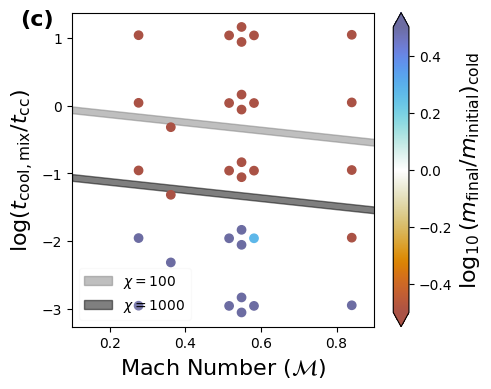

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr
import matplotlib.colors as mcolors

cs = 0.6209301549496956
t_cool_mix = 0.21648962
chi = 1000

def get_mass_ratio(path):
    data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass = cold_mass[cold_mass != 0]  
    return np.log10(np.mean(cold_mass[-50:]) / np.mean(cold_mass[0:10]))


hst_Test_15_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Turb/Turb.hst"
hst_Test_14_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Turb/Turb.hst"
hst_Test_16_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.01/Turb/Turb.hst"
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"

data_Test_15 = np.loadtxt(hst_Test_15_path, comments="#")
mass_Test_15 = data_Test_15[:, 2]
KE_Test_15 = data_Test_15[:, 6] + data_Test_15[:, 7] + data_Test_15[:, 8]
vturb_Test_15_array = np.sqrt(2 * KE_Test_15 / mass_Test_15)
vturb_Test_15 = np.mean(vturb_Test_15_array[-500:])
Mach_Test_15 = vturb_Test_15 / cs
r_cl_Test_15s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.75_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]
t_cc_Test_15 = np.sqrt(chi) * r_cl_Test_15s / vturb_Test_15

mass_ratios_15 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.001/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_10/Cloud/Turb.hst")]

data_Test_14 = np.loadtxt(hst_Test_14_path, comments="#")
mass_Test_14 = data_Test_14[:, 2]
KE_Test_14 = data_Test_14[:, 6] + data_Test_14[:, 7] + data_Test_14[:, 8]
vturb_Test_14_array = np.sqrt(2 * KE_Test_14 / mass_Test_14)
vturb_Test_14 = np.mean(vturb_Test_14_array[-500:])
Mach_Test_14 = vturb_Test_14 / cs
r_cl_Test_14s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.75_simulation_data.csv", delimiter=",", skiprows=1)[1:-2,1]
t_cc_Test_14 = np.sqrt(chi) * r_cl_Test_14s / vturb_Test_14

mass_ratios_14 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/Turb.hst")]
                   #get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_10/Cloud/Turb.hst")]


data_Test_16 = np.loadtxt(hst_Test_16_path, comments="#")
mass_Test_16 = data_Test_16[:, 2]
KE_Test_16 = data_Test_16[:, 6] + data_Test_16[:, 7] + data_Test_16[:, 8]
vturb_Test_16_array = np.sqrt(2 * KE_Test_16 / mass_Test_16)
vturb_Test_16 = np.mean(vturb_Test_16_array[-500:])
Mach_Test_16 = vturb_Test_16 / cs
r_cl_Test_16s = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.25_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]
t_cc_Test_16 = np.sqrt(chi) * r_cl_Test_16s / vturb_Test_16

mass_ratios_16 = [ get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.001/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.01/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_0.1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_1/Cloud/Turb.hst"),
                   get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_16/alpha_10/Cloud/Turb.hst")]


data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-500:])
Mach_Test_17 = vturb_Test_17 / cs
r_cl_Test_17s_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,1]  #Problem because there are 2 sims with the same r_cl values
r_cl_Test_17s = []
for i in r_cl_Test_17s_temp:
    r_cl_Test_17s.append(i + i * 0.25)
    r_cl_Test_17s.append(i)
    r_cl_Test_17s.append(i)
    r_cl_Test_17s.append(i - i * 0.25)
r_cl_Test_17s = np.array(r_cl_Test_17s)  

#Defining a different Mach number to get some offset
Mach_number_17 = []
for i in range(len(r_cl_Test_17s_temp)):
    Mach_number_17.append(vturb_Test_17/cs * 1 )
    Mach_number_17.append(vturb_Test_17/cs * 0.94)
    Mach_number_17.append(vturb_Test_17/cs * 1.06)
    Mach_number_17.append(vturb_Test_17/cs * 1 )

t_cc_Test_17 = np.sqrt(chi) * r_cl_Test_17s / vturb_Test_17

mass_ratios_17 = [      get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_4/Turb.hst"),
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_3/Turb.hst"),
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_2/Turb.hst"),    
                        get_mass_ratio("/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud/Turb.hst"),    
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_4/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_3/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst'),
                        get_mass_ratio('/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst')     ]
            



all_mass_ratios = mass_ratios_14 + mass_ratios_15 + mass_ratios_16 + mass_ratios_17
vmin, vmax = np.min(all_mass_ratios), np.max(all_mass_ratios)

plt.figure(figsize=(5, 4))
#plt.figure(figsize=(5, 6))
divnorm = mcolors.TwoSlopeNorm(vmin=-.5, vcenter=0, vmax=.5)

x_vals_100 = np.linspace(0.1, 0.9, 1000)  
y_vals_100 = -0.6 * x_vals_100

plt.fill_between(x_vals_100, y_vals_100 - 0.05, y_vals_100 + 0.05, color='gray', alpha=0.5, label = r"$\chi = 100$")
#### Maybe it needs a better label ?

x_vals_1000 = np.linspace(0.1, 0.9, 1000)  
y_vals_1000 = -0.6 * x_vals_1000 - 1  

plt.fill_between(x_vals_1000, y_vals_1000 - 0.05, y_vals_1000 + 0.05, color='black', alpha=0.5, label = r"$\chi = 1000$")

sc = plt.scatter(
    (np.concatenate([
        np.ones(len(r_cl_Test_15s)) * Mach_Test_15,
        np.ones(len(r_cl_Test_16s)) * Mach_Test_16,
        np.ones(len(r_cl_Test_14s)) * Mach_Test_14,
        (Mach_number_17 )
    ])),
    np.log10(np.concatenate([t_cool_mix / t_cc_Test_15, t_cool_mix / t_cc_Test_16, t_cool_mix / t_cc_Test_14, t_cool_mix / t_cc_Test_17])),
    c=np.concatenate([mass_ratios_15, mass_ratios_16, mass_ratios_14, mass_ratios_17]),
    cmap=cmr.prinsenvlag,  # Using a diverging colormap
    norm=divnorm,  # Ensure zero is white
)

cbar = plt.colorbar(sc, extend = 'both')
cbar.set_label(r"$ \log_{10}(m_{\rm final} / m_{\rm initial})_{\text{cold}}$", fontsize=16)

plt.text(-0.17, 0.96, "(c)", transform=plt.gca().transAxes, fontsize=16, fontweight="bold")

plt.xlabel(r"Mach Number ($\mathcal{M}$)", fontsize=16)
plt.ylabel(r"$\log(t_{\rm cool,mix} / t_{\rm cc})$", fontsize=16)
plt.xlim(left = 0.1, right = 0.9)
plt.legend(framealpha = 0.1, loc = "lower left")
#plt.yscale('log')

plt.tight_layout()
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.png" ,dpi = 900)
#plt.savefig("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.pdf")
#plt.show()


In [13]:
1 - np.random.uniform(-0.08, 0.08, size=len(Mach_number_17))

array([0.93117282, 0.93815785, 1.01448174, 1.05426923, 1.06564356,
       1.06745264, 0.9455086 , 1.00431497, 0.92289428, 0.98591837,
       0.93760741, 1.05596158, 0.99705461, 1.07698234, 0.92136379,
       0.9461808 , 0.95285304, 1.03183157, 1.07317177, 1.03151937])

In [11]:
np.ones(len(r_cl_Test_15s)) * Mach_Test_15

array([0.84020631, 0.84020631, 0.84020631, 0.84020631])

In [5]:
print(np.ones(len(r_cl_Test_17s)) * Mach_Test_17)

print(t_cool_mix / t_cc_Test_17)

[0.5486461 0.5486461 0.5486461 0.5486461 0.5486461 0.5486461 0.5486461
 0.5486461]
[1.09729221e-02 1.09729221e-02 1.09729210e-01 1.09729210e-01
 1.09729468e+00 1.09729468e+00 1.09731533e+01 1.09731533e+01]


In [28]:
def input_read(fn):
    # Function to read the input file and parse
    data = {}
    with open(fn, "r") as fp:
        lines = fp.readlines()
        for line in lines:
            if ("=" in line) and (line[0] != "#"):
                # print(line)
                key, value = line.split("#")[0].split("=")[:2]
                data[key.strip()] = value.strip()

    return data

In [29]:
paths = ['/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/athinput_init.turb',
         '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/athinput_init.turb',
         '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/athinput_init.turb' ]

data_0_01 = input_read(paths[1])
data_0_1 = input_read(paths[0])
data_1 = input_read(paths[2])

r_cl = [data_0_01["cloud_radius"],
        data_0_1["cloud_radius"],
        data_1["cloud_radius"]
       ]

print(r_cl)


['0.1062722', '0.01062722', '0.001062722']


In [14]:
#Finding t_corrs

paths_15 = ['/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.01/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_0.1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_15/alpha_10/Cloud/athinput_init.turb',          
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.1/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_0.01/Cloud/athinput_init.turb',
            '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_14/alpha_1/Cloud/athinput_init.turb',
           ]
t_corrs_15 = []

for i in paths_15:
    data = input_read(i)
    t_corr = data["tcorr"]
    t_corrs_15.append(float(t_corr))


NameError: name 'input_read' is not defined

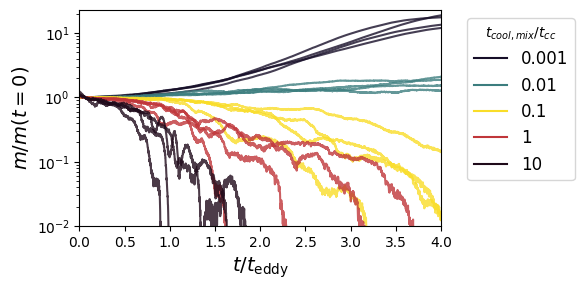

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr



#### NEEDS TO BE RECALCULATED FROM BOX INSTEAD
# t_corrs_17 = [27.3,27.3, 2.73,2.73, 0.273,0.273, 0.0273,0.0273]

## CALCULATE v_turb from turb box
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-200:])

Ls_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,2]
Ls = []
for i in Ls_temp:
    Ls.append(i)
    Ls.append(i)
    Ls.append(i)
    Ls.append(i)
    
#Ls = [ 8.501779258,8.501779258 , 0.850177926,0.850177926, 0.0850177926,0.0850177926,  0.00850177926,0.00850177926 ]

paths =[                "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_4/Turb.hst",
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_3/Turb.hst",
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_2/Turb.hst",   
                        "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud/Turb.hst",   
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_4/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_3/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst'    ]


def mass_change(path):
    data = data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass =cold_mass[cold_mass !=0 ]

    time = data[:len(cold_mass), 0]
    return (cold_mass / np.mean(cold_mass[0:128])), time
    
# Extract the group key based on alpha value
def extract_group(path):
    key = path.split("/")[6]  # Extract the alpha value
    key = key.replace("alpha_", "")  # Remove the "alpha_" prefix
    try:
        float(key)  # Check if it's a valid number
        return key  # Return only the numeric part
    except ValueError:
        return None  # Ignore if it’s not a number
# Store data in a dictionary
grouped_data = {}
for i, path in enumerate(paths):
    cold_mass, time = mass_change(path)
    t_eddy = Ls[i] / vturb_Test_17
    normalized_time = time / t_eddy
    group_key = extract_group(path)

    if group_key not in grouped_data:
        grouped_data[group_key] = []
    grouped_data[group_key].append((normalized_time, cold_mass))

# Create a colormap
colors = cmr.pride(np.linspace(0, 1, len(grouped_data)))
# Plot
# plt.figure(figsize=(8, 6))
# for color, (group_key, data) in zip(colors, grouped_data.items()):
#     for normalized_time, cold_mass in data:
#         plt.plot(normalized_time, cold_mass, color=color, alpha=0.8)  # Transparency for readability
#     plt.plot([], [], color=color, label=group_key)  # Single legend entry per group

# plt.yscale('log')
# plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=14)
# plt.ylabel(r"$m / m(t=0)$", fontsize=14)
# plt.legend(title="$t_{cool,mix} / t_{cc}$", fontsize=12)
# plt.tight_layout()
# plt.savefig("/u/ageorge/athena_fork_turb_box/plots/massvstime_large.png")
# plt.close()

plt.figure(figsize=(6, 3))
for color, (group_key, data) in zip(colors, grouped_data.items()):
    for normalized_time, cold_mass in data:
        plt.plot(normalized_time, cold_mass, color=color, alpha=0.8)  # Transparency for readability
    plt.plot([], [], color=color, label=group_key)  # Single legend entry per group
plt.xlim(right = 4, left = 0)
plt.ylim(bottom = 1e-2)
plt.yscale('log')
plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=14)
plt.ylabel(r"$m / m(t=0)$", fontsize=14)
plt.legend(title="$t_{cool,mix} / t_{cc}$", fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1))
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.png", bbox_inches="tight")
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()


In [42]:
Ls_temp
print(np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1))

Ls_highres = [np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[1, 2], 
              np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[-3, 2] ]

Ls_highres

[[1.00000000e-03 2.12544481e+00 8.50177926e+01 4.25088963e+01
  1.08150348e+00 2.73840115e+02 2.73840115e+00 2.73840115e+03]
 [1.00000000e-02 2.12544480e-01 8.50177926e+00 4.25088963e+00
  1.08150348e-02 2.73840115e+01 2.73840115e-01 2.73840115e+02]
 [1.00000000e-01 2.12544500e-02 8.50177926e-01 4.25088963e-01
  1.08150348e-04 2.73840115e+00 2.73840115e-02 2.73840115e+01]
 [1.00000000e+00 2.12544000e-03 8.50177930e-02 4.25088963e-02
  1.08150348e-06 2.73840115e-01 2.73840115e-03 2.73840115e+00]
 [1.00000000e+01 2.12540000e-04 8.50177900e-03 4.25088960e-03
  1.08150350e-08 2.73840115e-02 2.73840115e-04 2.73840115e-01]
 [1.00000000e+02 2.12500000e-05 8.50178000e-04 4.25089000e-04
  1.08150000e-10 2.73840115e-03 2.73840115e-05 2.73840115e-02]]


[np.float64(8.501779258), np.float64(0.085017793)]

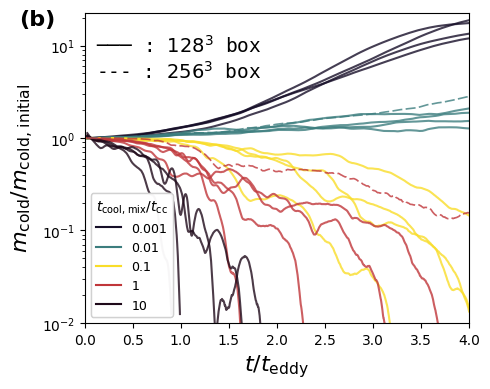

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cmasher as cmr


def load_mass_change(path):
    """Load cold mass and corresponding time, removing zero-mass entries."""
    data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass = cold_mass[cold_mass != 0]
    time = data[:len(cold_mass), 0]
    return cold_mass / np.mean(cold_mass[:128]), time


def extract_alpha_key(path):
    """Extract alpha value from path string."""
    key = path.split("/")[6].replace("alpha_", "")
    try:
        float(key)
        return key
    except ValueError:
        return None


#### Defining convolve function


def smooth(y, box_pts):
    
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


# Load reference turbulent velocity from Turb.hst
ref_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
ref_data = np.loadtxt(ref_path, comments="#")
mass_ref = ref_data[:, 2]
KE_ref = ref_data[:, 6] + ref_data[:, 7] + ref_data[:, 8]
vturb = np.mean(np.sqrt(2 * KE_ref / mass_ref)[-200:])

# Load eddy turnover lengths
Ls_raw = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)
Ls = np.repeat(Ls_raw[:-1, 2], 4)  # Each Ls used 4 times

Ls_highres = [Ls_raw[1, 2], Ls_raw[-3, 2]]

# Simulation paths
paths = [
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_4/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_3/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.001/Cloud/Turb.hst",
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_4/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_3/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_4/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_3/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_4/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_3/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_4/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_3/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst',
    '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst'
]

paths_highres = [
    "/ptmp/mpa/ageorge/athena/Cloud_0.01/Turb.hst",
    "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.hst"
]

# Group and normalize data
grouped_data = {}
grouped_highres = {}

for i, path in enumerate(paths):
    cold_mass, time = load_mass_change(path)

    #Smoothening the curve a bit
    cold_mass = smooth(cold_mass, 51)
    ############################
    
    t_eddy = Ls[i] / vturb
    normalized_time = time / t_eddy
    key = extract_alpha_key(path)
    if key:
        grouped_data.setdefault(key, []).append((normalized_time, cold_mass))

for i, path in enumerate(paths_highres):
    cold_mass, time = load_mass_change(path)

    #Smoothening the curve a bit
    cold_mass = smooth(cold_mass, 11)
    ############################
    
    t_eddy = Ls_highres[i] / vturb
    normalized_time = time / t_eddy
    # Manually assign keys to avoid extraction errors (e.g., folder "1" instead of "alpha_1")
    key = ["0.01", "1"][i]
    grouped_highres.setdefault(key, []).append((normalized_time, cold_mass))


# Plot

all_alpha_keys = sorted(grouped_data.keys(), key=lambda x: float(x))
colors = cmr.pride(np.linspace(0, 1, len(all_alpha_keys)))
color_map = {key: colors[i] for i, key in enumerate(all_alpha_keys)}
#colors = cmr.pride(np.linspace(0, 1, len(grouped_data)))

plt.figure(figsize=(5, 4))

# Plot low-res data (solid)
for group_key in all_alpha_keys:
    color = color_map[group_key]
    if group_key in grouped_data:
        for time, mass in grouped_data[group_key]:
            plt.plot(time[25:], mass[25:], color=color, alpha=0.8)
        plt.plot([], [], color=color, linestyle="-", label=group_key)






for group_key in all_alpha_keys:
    color = color_map[group_key]
    if group_key in grouped_highres:
        for time, mass in grouped_highres[group_key]:
            plt.plot(time, mass, color=color, linestyle=(0, (6, 2)), linewidth=1.2, alpha=0.8)

#########################
#### PLOTTING t_grow ####
#########################

# t_cold  = 0.02827667
# cs_cool = 0.02150
# lshatter = cs_cool * t_cold
# chi = 1000
# cs_hot = 0.6209301549496956
# M = vturb / cs_hot #Vturb already defined up
# t_grow = chi * np.sqrt(r_cl / (M * lshatter)) * (r_cl / L)**(-1/6 ) * t_cold


# Axis settings
plt.xlim(0, 4)
plt.ylim(1e-2, None)
plt.yscale("log")
plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=16)
plt.ylabel(r"$m_{\text{cold}} / m_{\text{cold, initial}}$", fontsize=16)

#plt.legend(title="$t_{cool,mix} / t_{cc}$", fontsize=12, loc="upper left", bbox_to_anchor=(1.05, 1))

# Main legend (top right)
legend = plt.legend(title=r"$t_{\text{cool, mix}} / t_{\text{cc}}$", fontsize=9,
                     loc="lower left", frameon=True)
plt.gca().add_artist(legend)



plt.text(0.03, 0.93,
         r"─── : $128^3$ box" + "\n" + r"--- : $256^3$ box",
         transform=plt.gca().transAxes,
         fontsize=14,
         verticalalignment="top",
         horizontalalignment="left",
         family='monospace',
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

plt.text(-0.17, 0.96, "(b)", transform=plt.gca().transAxes,
         fontsize=16, fontweight="bold")

plt.tight_layout()
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.png", bbox_inches="tight", dpi=900)
plt.savefig("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.pdf", bbox_inches="tight")
plt.show()


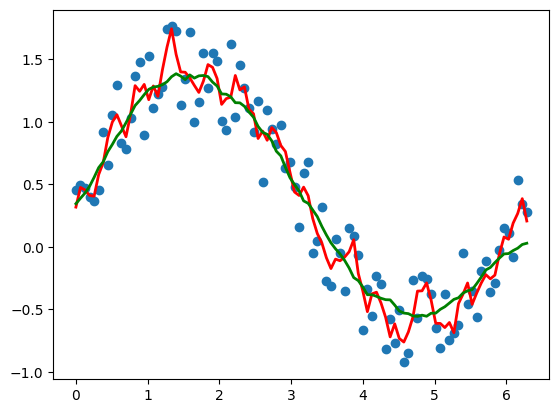

In [13]:

plt.plot(x, y,'o')
plt.plot(x, smooth(y,3), 'r-', lw=2)
plt.plot(x, smooth(y,19), 'g-', lw=2)

plt.show()

In [86]:
#### CALCULATE t_cold,c

t_cool = tcool_calc(amb_rho*np.sqrt(chi_cold),T_floor,Z, Lambda_fac=Lambda_fac)
cs_cool = cs_calc(T_floor)
print(t_cool, cs_cool)

[0.02827667] 0.021509651526489773


hello world!


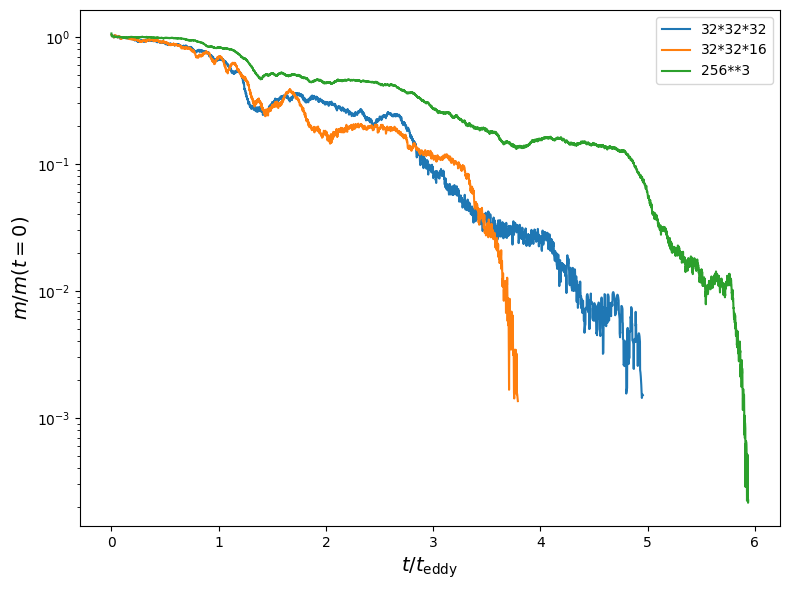

In [166]:
import numpy as np
import matplotlib.pyplot as plt

# Load turbulence data and calculate v_turb
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")

mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-500:])

# Define scales and file paths
Ls = [8.501779258, 8.501779258, 0.850177926, 0.850177926, 0.0850177926, 0.0850177926, 0.00850177926, 0.00850177926]
paths = [
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.1/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud_2/Turb.hst",
    "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/10/Cloud/Turb.hst"
]
import numpy as np
import matplotlib.pyplot as plt


#### NEEDS TO BE RECALCULATED FROM BOX INSTEAD
# t_corrs_17 = [27.3,27.3, 2.73,2.73, 0.273,0.273, 0.0273,0.0273]

## CALCULATE v_turb from turb box
hst_Test_17_path = "/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/alpha_0.01/Turb/Turb.hst"
data_Test_17 = np.loadtxt(hst_Test_17_path, comments="#")
mass_Test_17 = data_Test_17[:, 2]
KE_Test_17 = data_Test_17[:, 6] + data_Test_17[:, 7] + data_Test_17[:, 8]
vturb_Test_17_array = np.sqrt(2 * KE_Test_17 / mass_Test_17)
vturb_Test_17 = np.mean(vturb_Test_17_array[-200:])

Ls_temp = np.loadtxt("/u/ageorge/athena_fork_turb_box/M0.5_simulation_data.csv", delimiter=",", skiprows=1)[:-1,2]
Ls = [Ls_temp[3],Ls_temp[3], Ls_temp[3]]

    
#Ls = [ 8.501779258,8.501779258 , 0.850177926,0.850177926, 0.0850177926,0.0850177926,  0.00850177926,0.00850177926 ]

paths =[                
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud_1/Turb.hst',
                        '/u/ageorge/athena_fork_turb_box/Turb_v2_init/Test_17/1/Cloud/Turb.hst',
                        "/ptmp/mpa/ageorge/athena/Cloud_1/Turb.hst"

            ]




def mass_change(path):
    data = data = np.loadtxt(path, comments="#")
    data = data[data[:, 0].argsort()]
    cold_mass = data[:, 13]
    cold_mass =cold_mass[cold_mass !=0 ]

    time = data[:len(cold_mass), 0]
    return (cold_mass / np.mean(cold_mass[0:128])), time
    
plt.figure(figsize=(8,6))
label = ["32*32*32", "32*32*16", "256**3"]
for i in range(len(paths)):
    cold_mass, time = mass_change(paths[i])
    t_eddy = Ls[i] / vturb_Test_17
    plt.plot(time/t_eddy, cold_mass, label = label[i])

    
plt.yscale('log')
plt.xlabel(r"$t / t_{\rm eddy}$", fontsize=14)
plt.ylabel(r"$m / m(t=0)$", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()



In [11]:
from PIL import Image

# Open the saved plot images
density = Image.open("/u/ageorge/athena_fork_turb_box/plots/projections.png")
scatter = Image.open("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.png")
mass = Image.open("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.png")

# Get dimensions of the images
density_width, density_height = density.size
scatter_width, scatter_height = scatter.size
mass_width, mass_height = mass.size

# Assume scatter and mass plots have the same height,
# and we want to place them side by side.
bottom_width = scatter_width + mass_width
bottom_height = max(scatter_height, mass_height)

# The final image width is the maximum between the density image width and the bottom section
final_width = max(density_width, bottom_width)
# The final height is the density image height plus the bottom section height
final_height = density_height + bottom_height

# Create a new blank image (white background)
final_image = Image.new("RGB", (final_width, final_height), "white")

# Paste the density projection at the top
final_image.paste(density, (0, 0))

# Paste the scatter plot on the bottom left
final_image.paste(scatter, (0, density_height))

# Paste the mass vs. time plot on the bottom right
final_image.paste(mass, (scatter_width, density_height))

# Save and display the combined image
final_image.save("combined_figure.png")
final_image.show()

print(bottom_width)


1093


In [ ]:
from PIL import Image

# Open the saved plot images
density = Image.open("/u/ageorge/athena_fork_turb_box/plots/projections.png")
scatter = Image.open("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.png")
mass = Image.open("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.png")
# density = Image.open("/u/ageorge/athena_fork_turb_box/plots/projections.pdf")
# scatter = Image.open("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.pdf")
# mass = Image.open("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.pdf")
# Get dimensions of the images
scatter_width, scatter_height = scatter.size
mass_width, mass_height = mass.size

# Compute the total width of the bottom row
bottom_width = scatter_width + mass_width
bottom_height = max(scatter_height, mass_height)

# Resize density projection to match bottom_width while keeping aspect ratio
dens_ratio = bottom_width / density.width
new_dens_height = int(density.height * dens_ratio)
density_resized = density.resize((bottom_width, new_dens_height), Image.Resampling.LANCZOS)

# Determine the final image size: width is bottom_width, height is density + bottom
final_width = bottom_width
final_height = new_dens_height + bottom_height

# Create a new blank image with a white background
final_image = Image.new("RGB", (final_width, final_height), "white")

# Paste the resized density image on the top
final_image.paste(density_resized, (0, 0))

# Paste the scatter and mass images side by side on the bottom
final_image.paste(mass, (0, new_dens_height))
final_image.paste(scatter, (mass_width, new_dens_height))

final_image.save("combined_figure.png")
final_image.save("combined_figure.pdf")
final_image.show()


from PIL import Image, ImageChops

# Open the saved plot images
density = Image.open("/u/ageorge/athena_fork_turb_box/plots/projections.png")
scatter = Image.open("/u/ageorge/athena_fork_turb_box/plots/alpha_vs_Mach.png")
mass = Image.open("/u/ageorge/athena_fork_turb_box/plots/massvstime_small.png")

# Get dimensions of the images
scatter_width, scatter_height = scatter.size
mass_width, mass_height = mass.size

# Compute the total width of the bottom row
bottom_width = scatter_width + mass_width
bottom_height = max(scatter_height, mass_height)

# Resize density projection to match bottom_width while keeping aspect ratio
dens_ratio = bottom_width / density.width
new_dens_height = int(density.height * dens_ratio)
density_resized = density.resize((bottom_width, new_dens_height), Image.Resampling.LANCZOS)

# Reduce spacing by overlapping rows slightly
overlap_offset = 800  # You can tweak this value for more/less overlap
final_width = bottom_width
final_height = new_dens_height + bottom_height - overlap_offset

# Create a new blank image with white background
final_image = Image.new("RGB", (final_width, final_height), "white")

# Paste the resized density image at the top
final_image.paste(density_resized, (0, 0))

# Paste mass and scatter images with an upward nudge
final_image.paste(scatter, (mass_width - 180, new_dens_height - overlap_offset))
final_image.paste(mass, (0, new_dens_height - overlap_offset))


# Save and show
final_image.save("combined_figure.png")
final_image.save("combined_figure.pdf")
final_image.show()
